### Base de dados de Digitos escritos a mão

In [16]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

### Divisão da base de dados

In [17]:
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()

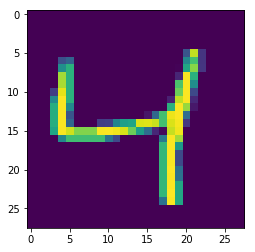

In [18]:
plt.imshow(x_treinamento[2])

Text(0.5, 1.0, 'Classe 4')

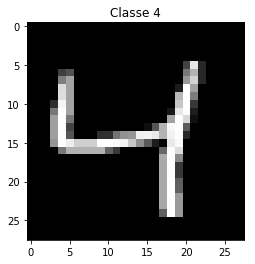

In [19]:
plt.imshow(x_treinamento[2], cmap='gray')
plt.title('Classe ' + str(y_treinamento[2]))

### Iremos trabalhar com apenas escalas de cinza para diminuir o custo
- alterar o formato do array de imagens para escala de cinza
- reshape(numLinhas, tamanho em pixel altura, tamanho em pixel largura, numero de canais)

In [20]:
previsores_treinamento = x_treinamento.reshape(x_treinamento.shape[0], 28, 28, 1)

In [21]:
previsores_teste = x_teste.reshape(x_teste.shape[0], 28, 28, 1)

### Setar o tipo das imagens, aumentando para float 32

In [22]:
previsores_treinamento = previsores_treinamento.astype('float32')

In [23]:
previsores_teste = previsores_teste.astype('float32')

### Reduzir a escala dos valores dos pixel
- escala de 0 a 1
- divisao por 255

In [24]:
previsores_treinamento /= 255

In [25]:
previsores_teste /= 255

In [26]:
previsores_treinamento[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Transformação dos valores das classes para valores categoricos

In [27]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)

In [28]:
classe_teste  = np_utils.to_categorical(y_teste, 10)

### Estrutura da Rede Neural

In [29]:
classificador = Sequential()
#primeira camada de convolução
classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
#segunda camada de convolução
classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
#Flatten para transformar a matriz num vetor
classificador.add(Flatten())


classificador.add(Dense(units=128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation = 'relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=10, activation='softmax'))
classificador.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
classificador.fit(previsores_treinamento, classe_treinamento, batch_size=128, epochs=10, validation_data = (previsores_teste, classe_teste))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2114 - accuracy: 0.9343 - val_loss: 0.1382 - val_accuracy: 0.9590
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0639 - accuracy: 0.9805 - val_loss: 0.0354 - val_accuracy: 0.9886
Epoch 3/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0347 - val_accuracy: 0.9889
Epoch 5/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 0.0402 - val_accuracy: 0.9867
Epoch 6/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0425 - val_accuracy: 0.9884
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/st

In [31]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

10000/10000 [==============================] - 5s 500us/step


In [32]:
resultado

[0.038939872682227136, 0.9897000193595886]